In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
from IPython.display import Audio
%matplotlib inline
import os

from sklearn.decomposition import FastICA

from mcc import mean_corr_coef as mcc

In [4]:
f, x1 = scipy.io.wavfile.read('mixed_audios/3components/mixed_1.wav')

f, x2 = scipy.io.wavfile.read('mixed_audios/3components/mixed_2.wav')

f, x3 = scipy.io.wavfile.read('mixed_audios/3components/mixed_3.wav')

In [5]:
X = np.array([x1, x2, x3])

In [6]:
X = X.T

In [7]:
X.shape

(559104, 3)

In [14]:
transformer = FastICA(n_components=3, random_state=0, whiten=True)

In [15]:
S_est = transformer.fit_transform(X)

In [16]:
S_est.shape

(559104, 3)

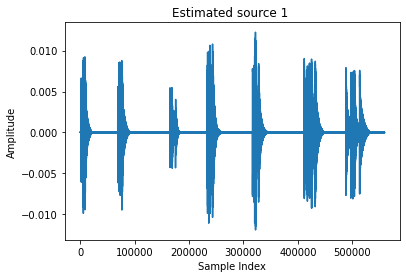

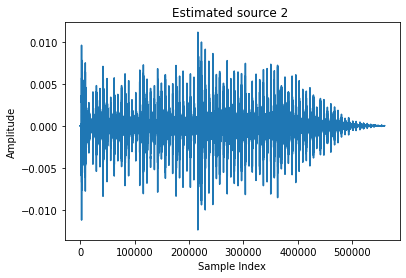

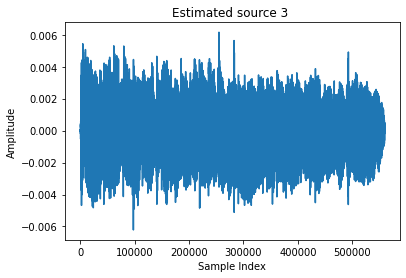

In [17]:
# Visualize and play estimated sources
for i in range(S_est.shape[1]):

    s = S_est[:,i]

    # plot waveform
    plt.figure()
    plt.plot(s)
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.title('Estimated source %d ' % (i+1))
    plt.show()

    # Play audio
    aud = Audio(s, rate=f)
    display(aud)

In [25]:
f, s1 = scipy.io.wavfile.read('sources/acoustic.wav')

f, s2 = scipy.io.wavfile.read('sources/bubbles.wav')

f, s3 = scipy.io.wavfile.read('sources/logdrums.wav')

In [26]:
S = np.array([s1, s2, s3])

S = S.T

In [27]:
mcc(S_est, S)

0.9999393542358067